In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('Titanic.csv')
df=pd.DataFrame(df)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we could see there are missing values in Age, cabin and Embarked coulmns

In [6]:
df.isnull().sum()/df.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In oercentage the missing data 19.86% or 177 values missing from age coulmn and 77.104% or 687 values missing from Cabin coulm and 0.22% or 2 values missing from Embarked column.

In [7]:
df.shape

(891, 12)

We have 891rows and 12 columns present in this data set.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SibSp          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Parch                AxesSubplot(0.125,0.125;0.133621x0.343182)
Fare              AxesSubplot(0.285345,0.125;0.133621x0.343182)
dtype: object

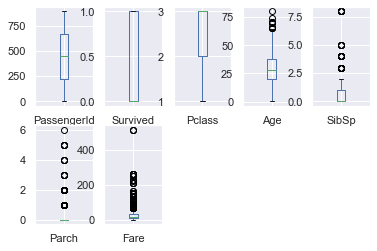

In [9]:
df.plot(kind='box',subplots=True, layout=(2,5))

We have outliers and missing values in age column.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

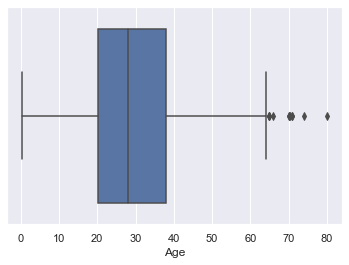

In [10]:
sns.boxplot('Age',data=df)

We will have to convert the string data from the data set first and then will again check for the outliers if any in other columns

In [11]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [12]:
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


We have replace the missing Age vaules by Mean.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [16]:
df.drop(labels = ["Name"], axis = 1, inplace = True)    # Passwnger names are of no use as they will not contribute in predicting model

In [17]:
df.drop(labels = ["PassengerId"], axis = 1, inplace = True)    # Passenger ID is also of no use to us as with a count of passengers adn is non repepative hence are droping them

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [19]:
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])    # we are using label encoder to converst string data of Sex coulm in binary or integer data

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,0,19.000000,0,0,112053,30.0000,B42,S
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,1,26.000000,0,0,111369,30.0000,C148,C


In [21]:
df['Cabin']= df['Cabin'].fillna(df['Cabin'].mode()[0])   # we are filling the missing value using the Mode value as this is a categorcal data

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,0,19.000000,0,0,112053,30.0000,B42,S
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,1,26.000000,0,0,111369,30.0000,C148,C


In [23]:
df['Cabin'].value_counts()     # we are calculating the cabin count first.

B96 B98        691
G6               4
C23 C25 C27      4
D                3
C22 C26          3
              ... 
B42              1
C87              1
C101             1
B37              1
C104             1
Name: Cabin, Length: 147, dtype: int64

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,0,35.000000,1,0,113803,53.1000,C123,S
4,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,0,19.000000,0,0,112053,30.0000,B42,S
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,1,26.000000,0,0,111369,30.0000,C148,C


In [25]:
replaces = {'B51 B53 B55': 'B55', 'B52 B54 B56': 'B56', 'B57 B59 B63 B66': 'B66', 'B58 B60': 'B60',
            'B82 B84': 'B84', 'B96 B98': 'B98', 'C22 C26': 'C26', 'C23 C25 C27': 'C27', 'C55 C57': 'C57',
            'C62 C64': 'C64', 'D10 D12': 'D12', 'E39 E41': 'E41', 'F E46': 'E46', 'F E57': 'E57',
            'F E69': 'E69', 'F G63': 'G63', 'F G73': 'G73', 'F': None, 'D': None, ' ': None, 'T': None, np.nan: None}
df["Cabin"] = df["Cabin"].replace(replaces)
df["Cabin"] = df.fillna(np.nan)["Cabin"].str[1:].astype(float)

We saw in count that the data is repetative using oter nomenclature, hence we are replacing the data for our convinience and then converting it into float data 

In [26]:
df.drop(labels = ["Cabin"], axis = 1, inplace = True)     # float data is not getting convert in integer hence we are dropping this column also the data of cabin is not that important

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.000000,1,0,113803,53.1000,S
4,0,3,1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,S
887,1,1,0,19.000000,0,0,112053,30.0000,S
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,1,26.000000,0,0,111369,30.0000,C


In [28]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We arechnaging the vules of Embarked 
S=2, C=0 and Q=1

In [29]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,2.0
1,1,1,0,38.000000,1,0,PC 17599,71.2833,0.0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2.0
3,1,1,0,35.000000,1,0,113803,53.1000,2.0
4,0,3,1,35.000000,0,0,373450,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,2.0
887,1,1,0,19.000000,0,0,112053,30.0000,2.0
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,2.0
889,1,1,1,26.000000,0,0,111369,30.0000,0.0


In [31]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mean())

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,2.0
1,1,1,0,38.000000,1,0,PC 17599,71.2833,0.0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2.0
3,1,1,0,35.000000,1,0,113803,53.1000,2.0
4,0,3,1,35.000000,0,0,373450,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,2.0
887,1,1,0,19.000000,0,0,112053,30.0000,2.0
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,2.0
889,1,1,1,26.000000,0,0,111369,30.0000,0.0


# Visulization of data

<AxesSubplot:xlabel='Embarked', ylabel='count'>

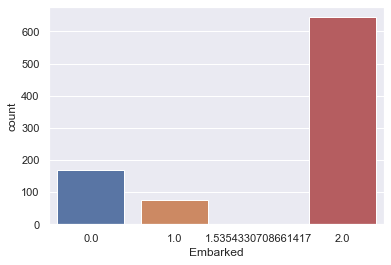

In [33]:
sns.countplot(x = "Embarked", data = df)

From above grap we could understand that the number of passwngers that off boarded the ship at location S C and Q.

<AxesSubplot:xlabel='Sex', ylabel='count'>

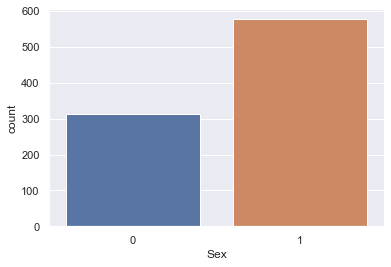

In [34]:
sns.countplot(x = "Sex", data = df)

The data show thenumber of Males (1) and Females(0) presnt on ship at time on incident.

<AxesSubplot:xlabel='Fare', ylabel='count'>

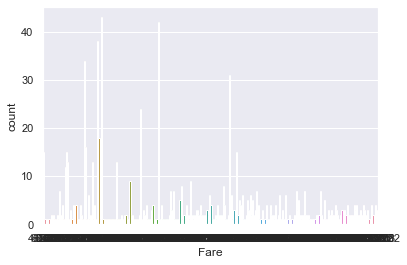

In [35]:
sns.countplot(x = "Fare", data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

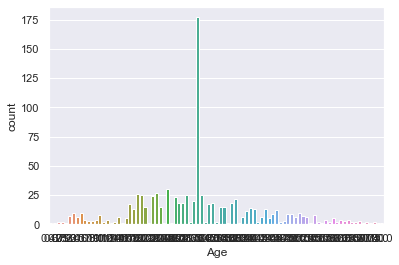

In [36]:
sns.countplot(x = "Age", data = df)

In [37]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()
    

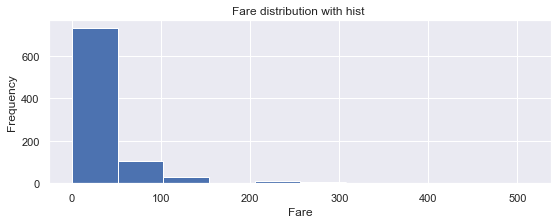

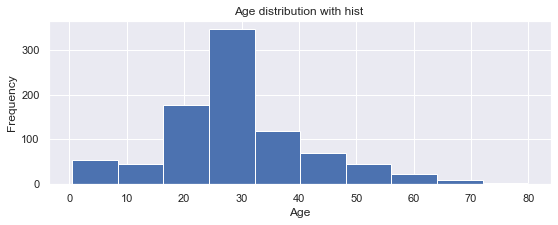

In [38]:
numericVar = ["Fare","Age"]
for n in numericVar:
    plot_hist(n)

Above graph shows the number of people of various age group that were onboard Titanic along with Fare.
People of various age group were present on the ship with maximum age between 20 years to 45, there infants of age group 0 years to 5 and childeren of age group 5 to 15 years.
The fare paid by most passengers were between 0 to 50 as can be seen in above graph.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

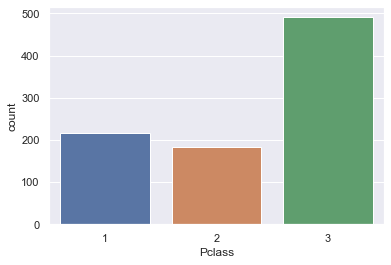

In [39]:
sns.countplot(x = "Pclass", data = df)

We can see that there were large number of passenger in Pclass 3around 500 while less tahn 200 on Pclass2 and more than 200 on Pclass1.

<AxesSubplot:xlabel='Survived', ylabel='count'>

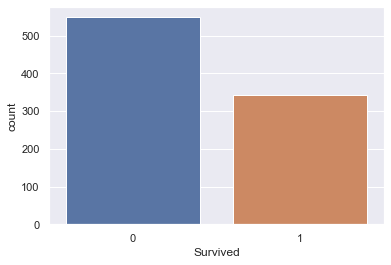

In [40]:
sns.countplot(x = "Survived", data = df)

Above graph shows around 500 more people were killed and around only 350 survived the incident.

<AxesSubplot:xlabel='Parch', ylabel='count'>

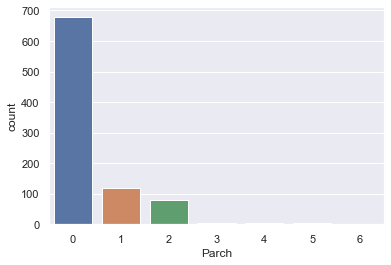

In [41]:
sns.countplot(x = "Parch", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


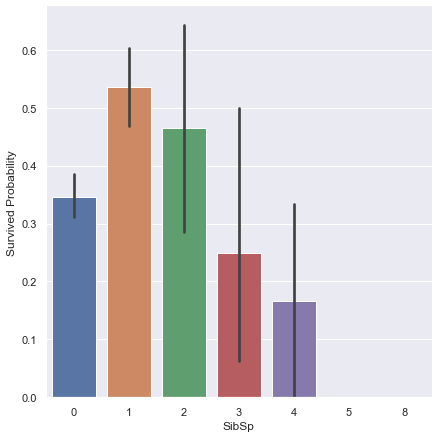

In [42]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

We can see the probability of people survived.

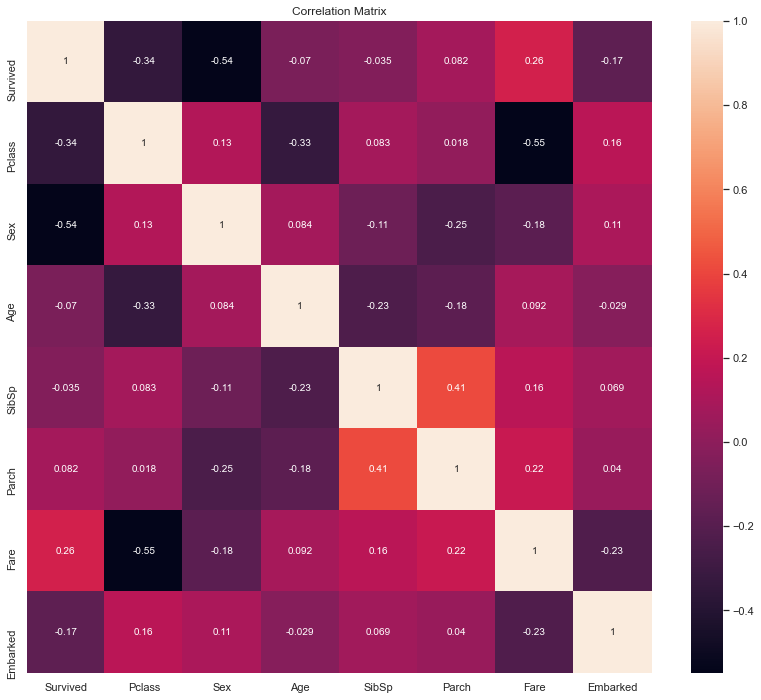

In [43]:
corr_mat=df.corr()
plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We conclude that Fare is having relationhip with the Survived from above corealtion graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


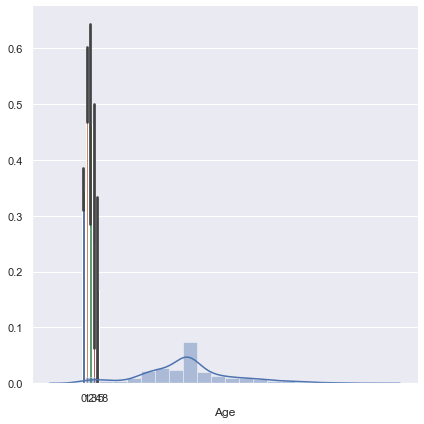

In [44]:
g.map(sns.distplot, "Age", bins = 20)
plt.show()

The people of age 20 to 40 were the highest who died in the incident while the infants and people of age less than 10 and more than 70 have high rate of survival.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


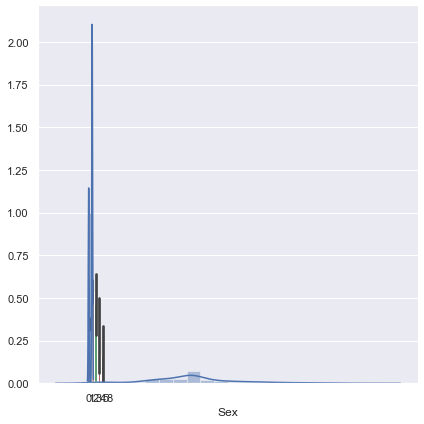

In [45]:
g.map(sns.distplot, "Sex", bins = 1)
plt.show()

Females have surived the incidenat while the males were the most who died.

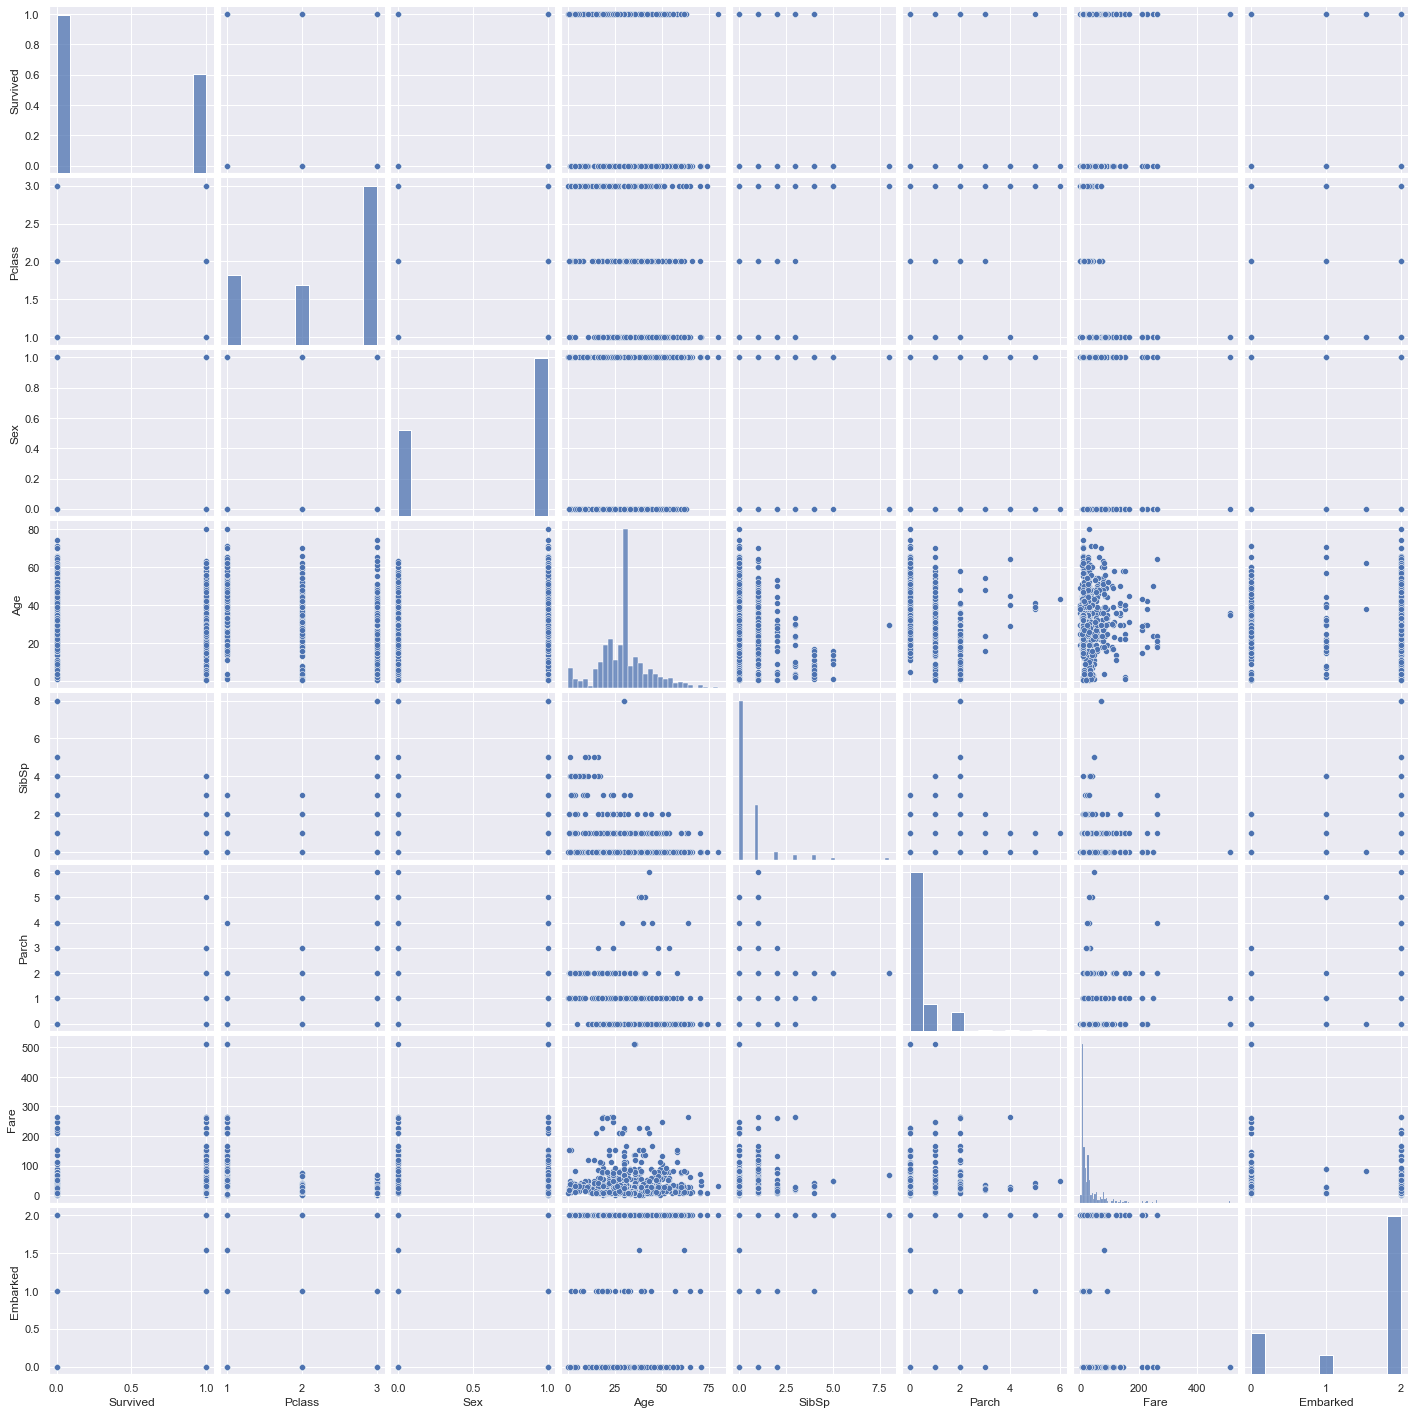

In [46]:
sns.pairplot(df)

We can see the linear relationship of Fare with Parch, sibsp and Age.
We can see the relationship of Age with Cabin , Fare,Parch, sibsp.

In [47]:
df.drop(labels = ["Ticket"], axis = 1, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 52.3 KB


In [49]:
df['Age'] = df['Age'].astype(int) 

In [50]:
df['Fare'] = df['Fare'].astype(int) 

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2.0
1,1,1,0,38,1,0,71,0.0
2,1,3,0,26,0,0,7,2.0
3,1,1,0,35,1,0,53,2.0
4,0,3,1,35,0,0,8,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2.0
887,1,1,0,19,0,0,30,2.0
888,0,3,0,29,1,2,23,2.0
889,1,1,1,26,0,0,30,0.0


In [52]:
df['Embarked'] = df['Embarked'].astype(int) 

In [53]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,7,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2
887,1,1,0,19,0,0,30,2
888,0,3,0,29,1,2,23,2
889,1,1,1,26,0,0,30,0


Model Building

The data set is an classic example of classification hence we will use classifier model.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x=df.iloc[:,1:11]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,2
1,1,0,38,1,0,71,0
2,3,0,26,0,0,7,2
3,1,0,35,1,0,53,2
4,3,1,35,0,0,8,2


In [56]:
y=df.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
x.shape

(891, 7)

In [58]:
y.shape

(891,)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [60]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [62]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()        
lg

LogisticRegression()

In [63]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

[0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0]


In [64]:
y_pred = lg.predict(x_test)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))                  # Logistic regression
print(classification_report(y_test,pred))

0.770949720670391
[[92 16]
 [25 46]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       108
           1       0.74      0.65      0.69        71

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [66]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print (accuracy_score(y_test,predsvc))                             #SVC
print (confusion_matrix(y_test,predsvc))
print (classification_report(y_test,predsvc))

0.7932960893854749
[[99  9]
 [28 43]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       108
           1       0.83      0.61      0.70        71

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)                                       #Decision tree classifier
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6703910614525139
[[82 26]
 [33 38]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       108
           1       0.59      0.54      0.56        71

    accuracy                           0.67       179
   macro avg       0.65      0.65      0.65       179
weighted avg       0.67      0.67      0.67       179



In [68]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)                       # Random forest classifier
print (accuracy_score(y_test,predrf))
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

0.770949720670391
[[99  9]
 [32 39]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       108
           1       0.81      0.55      0.66        71

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.77      0.76       179



In [69]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lg, x,y, cv=5)
print("Cross Validation score of LogisticRegression model :",scr.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validation score of LogisticRegression model : 0.78788525516289


In [70]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x,y, cv=5)
print("Cross Validation score of SVC model :",scr.mean())

Cross Validation score of SVC model : 0.674615529470843


In [71]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt, x,y, cv=5)
print("Cross Validation score of DecisionTree model :",scr.mean())

Cross Validation score of DecisionTree model : 0.7957504237022158


In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x,y, cv=5)
print("Cross Validation score of RandomForest model :",scr.mean())

Cross Validation score of RandomForest model : 0.8114870378507313


 Logistic regressor model havethe elast difference of 3 hence this is the best model.

Hyper parameter tunning

We will now use Logistic regression model as the defference between the accuracy and crossvalidation score of all the model when calculated, Logistic regressor model havethe elast difference of 3.
hence we will go with gridsearch of Logistic regressor.

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
lg = LogisticRegression(
    random_state=10,
    class_weight="balanced",
    solver="liblinear",
)

lg = GridSearchCV(
    lg, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

lg.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=10, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [75]:
import joblib
joblib.dump(lg,"Titanic.pkl")

['Titanic.pkl']